<font size="6">Laplace Problem On a Square</font>


<font size = "4"> Student: Parth Jitendra Vaya </font>

1) Firstly, using the <font size='5'>Jacobi Method</font>, you need to first add a grid with a uniform spacing since it is a square, then we need to initialize the electric potential grid within the square and also add the boundary conditions

In [111]:
import numpy as np
import matplotlib.pyplot as plt

#grid parameters
size_x = 10
size_y = 10
grid_spacing = 0.1
max_iterations = 1000
tolerance = 1e-4

#initialize the potential grid and adding the boundary conditions
V = np.zeros((size_x, size_y))

V[:, 0] = V[:, -1] = 0 #ground for the first and last columns
V[0, :] = V[-1, :] = 0  # Sides for the first and last rows
V[4, 4] = 100  # Wire

- I used a surface plot of 10 and 10 for both the x and y axis with a grid spacing of 0.1 for all the approaches because firstly we need a square and hence the smaller the grid spacing the more accurate the results and since i used a small grid i decreased the grid spacing 

- The code also has a termination step of 1000 iterations to compute which is required since it can also be possible that it infinitely iterates which can take alot of computer power.


In [112]:
# Performing the iterations

for iteration in range(max_iterations):
    V_new = V.copy() #to create a copy of the potential grid
    
    for i in range(1, size_x - 1):
        for j in range(1, size_y - 1):
            V_new[i,j] = 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])
            
    max_change = np.max(np.abs(V_new - V))
    V = V_new #update potential grid
    
    # this checks for the convergence in the iterative numerical slutoon
    if max_change < tolerance:
        print(f"converged  after {iteration} iterations")
        break

converged  after 184 iterations


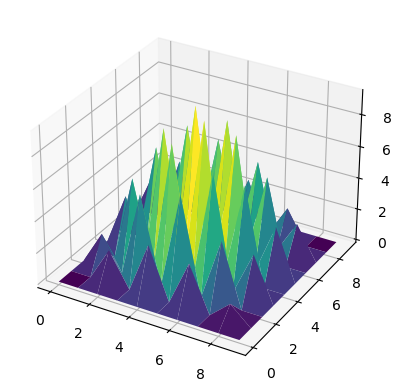

In [113]:
#visualization

X, Y = np.meshgrid(np.arange(0, size_x), np.arange(0, size_y))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V, cmap='viridis')
plt.show()

2. Now using the <font size = '5'> Gauss-Jacobi </font> method

In [43]:
#this was all kept the same

import numpy as np
import matplotlib.pyplot as plt

#grid parameters
size_x = 10
size_y = 10
grid_spacing = 0.1
max_iterations = 1000
tolerance = 1e-4

#initialize the potential grid and adding the boundary conditions
V = np.zeros((size_x, size_y))

V[:, 0] = V[:, -1] = 0 #ground for the first and last columns
V[0, :] = V[-1, :] = 0  # Sides for the first and last rows
V[4, 4] = 100  # Wire


In [44]:
# a couple changes were made in the iteration loop

for iteration in range(max_iterations):
    max_change = 0  # Initialize the maximum change to 0

    for i in range(1, size_x - 1):
        for j in range(1, size_y - 1):
            # Update the potential using the Gauss-Seidel method
            new_potential = 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])
            max_change = max(max_change, abs(new_potential - V[i, j]))
            V[i, j] = new_potential

    if max_change < tolerance:
        print(f"Converged after {iteration} iterations")
        break


Converged after 69 iterations


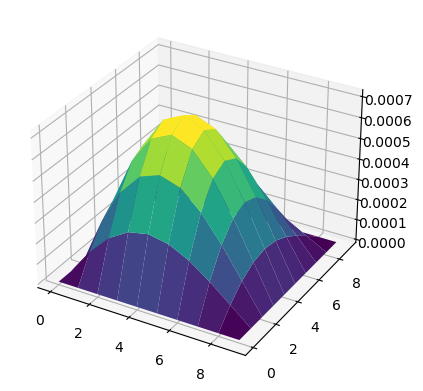

In [45]:
#visualization

X, Y = np.meshgrid(np.arange(0, size_x), np.arange(0, size_y))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V, cmap='viridis')
plt.show()

This visualization is different from the Jacobi approach and also needs few iterations and hence converges faster, this is because the Gauss-Seidel approach basically updates the potential values sequentially, point by point, with the most recently updated values used for each point's neighbours and hence uses the most recent potential values of of the neighbouring points, hence converges faster in the contrary, the Jacobi approach basically updates the potential values of the previous iteration , and these updates are applied simultaneously across the entire grid, hence the updates for all grid points are calculated independently of one another, meaning they are not infulenced by the updated values of their neighbouring points within the same iteration.

3. Now using the <font size = '5'>SOR-approach </font> 

In [107]:
#this was all kept the same

import numpy as np
import matplotlib.pyplot as plt

#grid parameters
size_x = 10
size_y = 10
grid_spacing = 0.1
max_iterations = 1000
tolerance = 1e-4

#initialize the potential grid and adding the boundary conditions
V = np.zeros((size_x, size_y))

V[:, 0] = V[:, -1] = 0 #ground for the first and last columns
V[0, :] = V[-1, :] = 0  # Sides for the first and last rows
V[4, 4] = 100  # Wire

In [108]:
# a couple changes were made in the iteration loop

for iteration in range(max_iterations):
    max_change = 0  # Initialize the maximum change to 0
    
    omega = 1.2
    # this value was used since, if we want for a faster convergence than gauss-seidel, the range should be between 1 < omega < 2

    for i in range(1, size_x - 1):
        for j in range(1, size_y - 1):
            old_potential = V[i,j] #to store the old potential 
            
            #formula to calculate the new potential
            new_potential = (1- omega) * old_potential + (omega/4) * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])
            max_change = max(max_change, abs(new_potential - old_potential))
            V[i, j] = new_potential

    if max_change < tolerance:
        print(f"Converged after {iteration} iterations")
        break


Converged after 46 iterations


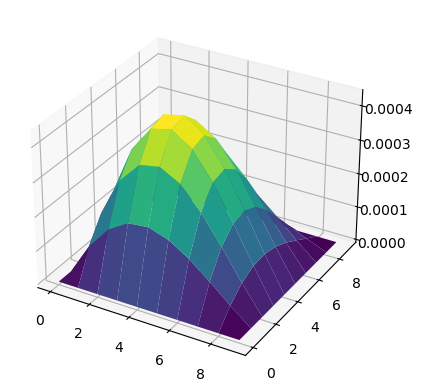

In [109]:
#visualization

X, Y = np.meshgrid(np.arange(0, size_x), np.arange(0, size_y))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V, cmap='viridis')
plt.show()

The SOR approach is an improvement of the Gauss-Seidel method as it introduces a relaxation factor omega to speed up the convergence. because you update the potential values as a weighted average of the current value and the nearly computed value .